### Importing Important Library ###

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data ###

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Data discription ###

In [6]:
print(customers.shape)
print(products.shape)
print(transactions.shape)

(200, 4)
(100, 4)
(1000, 7)


In [7]:
customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [8]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [9]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [10]:
# Inspecting datasets for missing values and data types
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


### Data Cleaning, preprocessing ### 

In [19]:
# Checking for missing values
print(customers.isnull().sum(),'\n')
print(products.isnull().sum(),'\n')
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [26]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

### Insights from EDA ###

In [32]:
# Summary of categorical variables
print(customers['Region'].value_counts())  # Distribution of customers by region
print(products['Category'].value_counts())  # Distribution of products by category


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [33]:
# Summary statistics of numerical variables
print(transactions[['Quantity', 'TotalValue', 'Price']].describe())


          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


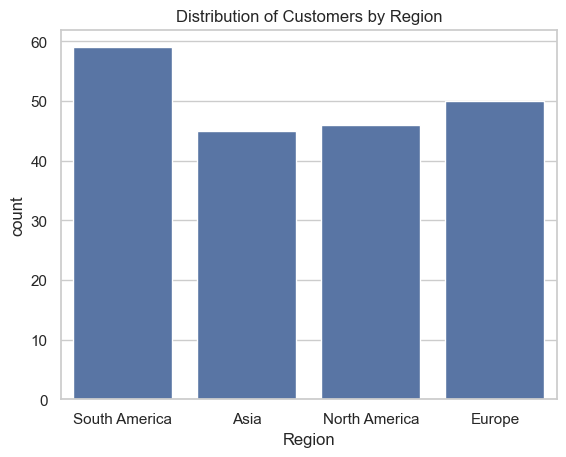

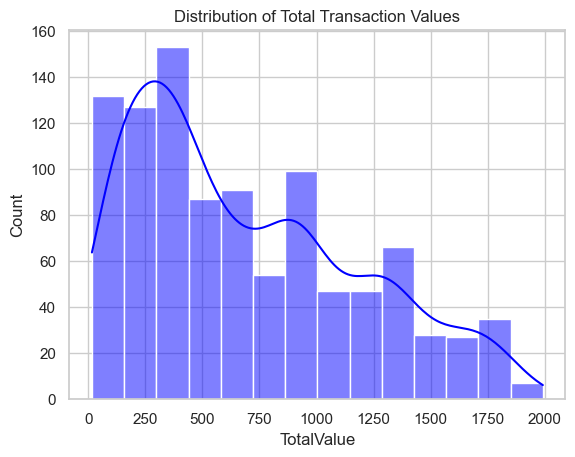

In [44]:

# Bar chart for regions
sns.countplot(data=customers, x='Region')
plt.title('Distribution of Customers by Region')
plt.show()

# Histogram for transaction values
sns.histplot(data=transactions, x='TotalValue', kde=True, color='blue')
plt.title('Distribution of Total Transaction Values')
plt.show()


In [35]:
# Total transaction value by region
region_spending = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
print(region_spending)


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


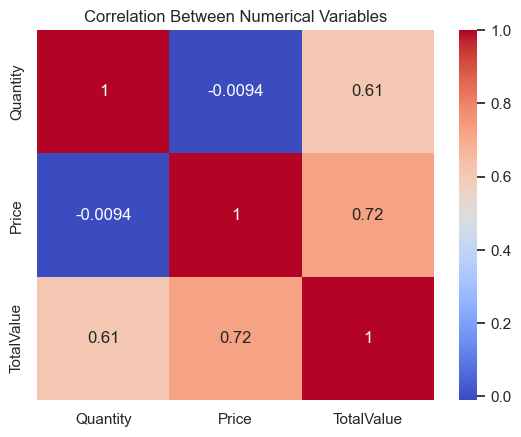

In [36]:
# Correlation heatmap
corr_matrix = transactions[['Quantity', 'Price', 'TotalValue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Variables')
plt.show()


In [37]:
# Merge transactions with products
merged_data = transactions.merge(products, on='ProductID')
category_spending = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_spending)


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [38]:
# Products purchased by customers in each region
region_category = merged_data.merge(customers, on='CustomerID').groupby(['Region', 'Category'])['Quantity'].sum()
print(region_category)


Region         Category   
Asia           Books          120
               Clothing       166
               Electronics    132
               Home Decor     142
Europe         Books          165
               Clothing       119
               Electronics    144
               Home Decor     167
North America  Books          155
               Clothing       147
               Electronics    153
               Home Decor     138
South America  Books          241
               Clothing       158
               Electronics    198
               Home Decor     192
Name: Quantity, dtype: int64


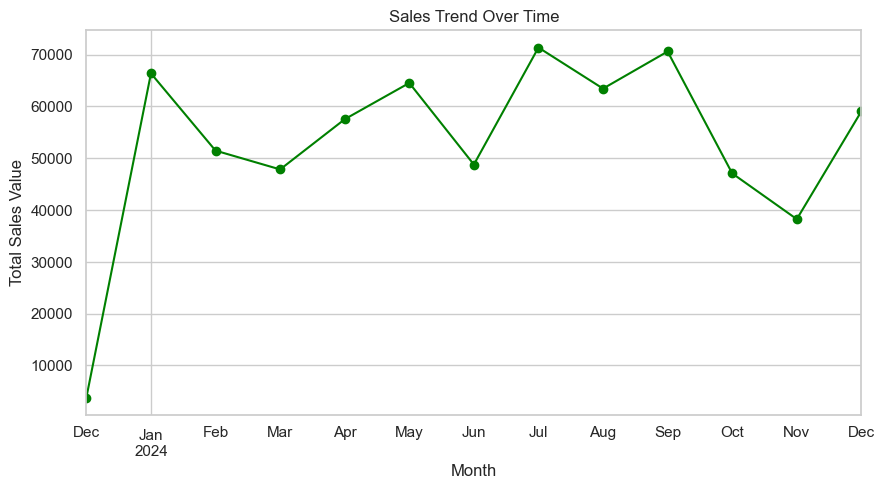

In [39]:
# Transactions by month
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()

# Line plot for sales trend
monthly_sales.plot(kind='line', marker='o', color='green', figsize=(10, 5))
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.show()
